# What's Cooking?

#### Use recipe ingredients to categorize the cuisine. 

### The codes will be divided into 4 parts: 
#### 1. Import Libraries
#### 2. Data Preparation
#### 3. Exploratory Analysis
#### 4. Machine Learning

## 1. Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import zipfile
import math
sb.set()

## 2. Data Preparation

### 2. a) Extract dataset

Extract train.json from zipfile and peek using head function. 

In [2]:
train_file = zipfile.ZipFile('train.json.zip', 'r')
train_data = pd.read_json(train_file.read('train.json'))
train_data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


id is read as integers.
cuisine and ingredients are read as objects.
The columns with object dtype are the possible categorical features in dataset.

### 2. b) Filter categorical data and check for null values in the dataset

In [4]:
cat_train_data = train_data.select_dtypes(include=['object']).copy()
cat_train_data.head()

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
print("The dataset has", cat_train_data.isnull().values.sum(), "null value(s).")

The dataset has 0 null value(s).


### 2. c) Prepare the data so that the dataset is in the proper format

In [6]:
cuisine_dict_count = {} # Initialize an empty dictionary for cuisines
for c_count in train_data['cuisine']:
    if c_count in cuisine_dict_count.keys():
        cuisine_dict_count[c_count] += 1
        # Increment the count by 1
    else:
        cuisine_dict_count[c_count] = 1

In [7]:
print('There are', len(cuisine_dict_count), 'types of cuisines in total, which are', list(cuisine_dict_count.keys()),'.')

There are 20 types of cuisines in total, which are ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'] .


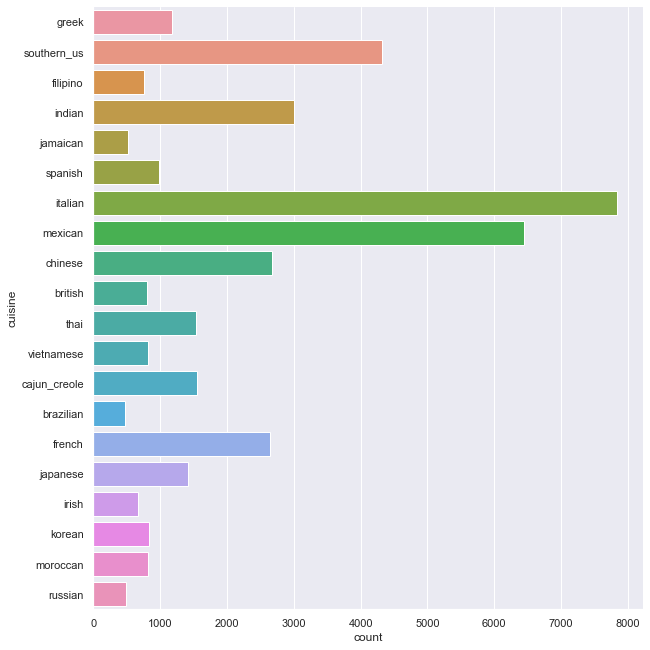

In [8]:
sb.catplot(y='cuisine', data = cat_train_data, kind = 'count', height = 9)

In [9]:
ingredient_dict_count = {} # Initialize an empty dictionary for ingredients
for b in train_data['ingredients']: # b is a set of ingredients for each cuisine
    for a in b:
        # a is an ingredient from the given set of ingredients
        if a in ingredient_dict_count.keys():
            ingredient_dict_count[a] += 1
            # Increment the count by 1
        else:
            ingredient_dict_count[a] = 1

In [10]:
print("There are", len(ingredient_dict_count), "types of ingredients in total.")

There are 6714 types of ingredients in total.


In [11]:
for e in ingredient_dict_count.keys():
    train_data[e] = np.zeros((train_data.shape[0], 1))
    # To create a new ingredient column with 0 as initial value
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
for m in range(len(train_data)):
    # range(len(train_data)) outputs [0, 1, 2,..., 39772, 39773] which are the row indices for train_data
    for n in train_data['ingredients'][m]:
        train_data[n].iloc[m] = 1
        # 1 means the ingredient is present whereas 0 indicates that the ingredient is not present

C:\Users\lrazerblade\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
train_data # The ingredient that is present will be indicated as 1 in this dataframe

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
ingredient_dict_count # This shows the number of ingredients used for all the cuisines

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

### 2. d) (I) Create a new dataframe named main_data
#### main_data is a dataframe that stores the sum of each ingredient for all the cuisines respectively. 

In [15]:
main_data = pd.DataFrame(list(cuisine_dict_count.keys()), columns = ['cuisine'])
# To create a new dataframe named main_data
main_data

,cuisine
0,greek
1,southern_us
2,filipino
3,indian
4,jamaican
5,spanish
6,italian
7,mexican
8,chinese
9,british


In [16]:
for cols in ingredient_dict_count.keys():
    main_data[cols] = np.zeros((main_data.shape[0], 1))
main_data # main_data is a dataframe with only 20 rows(20 cuisines)

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,mexican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = train_data.drop(['id','ingredients'],axis=1)
# To drop id and ingredients columns
X

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,italian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
count_row = -1
for cuisine_type in cuisine_dict_count.keys():
    Y = X.loc[X["cuisine"] == cuisine_type]
    # X is a dataframe without id and ingredients column
    # Y is a dataframe with only particular cuisine shown
    count_row += 1
    count_column = 1
    for ingredient_type in ingredient_dict_count.keys():
        total = Y[ingredient_type].sum()
        main_data.iloc[[count_row],[count_column]] = total
        count_column += 1

In [19]:
main_data # main_data is a dataframe that stores the sum of each ingredient for all the cuisines respectively

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,39.0,31.0,26.0,216.0,203.0,186.0,3.0,23.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,southern_us,8.0,3.0,14.0,259.0,549.0,95.0,17.0,1.0,3.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,1.0,325.0,199.0,13.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,3.0,0.0,5.0,726.0,205.0,170.0,5.0,36.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,139.0,125.0,26.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,4.0,4.0,6.0,128.0,133.0,55.0,2.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,33.0,67.0,98.0,1471.0,965.0,350.0,12.0,18.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,mexican,103.0,92.0,53.0,1317.0,806.0,618.0,31.0,17.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,chinese,13.0,0.0,2.0,763.0,158.0,33.0,11.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,british,0.0,0.0,0.0,34.0,88.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. d) (II) Create a new dataframe named popular_ingredient_data
#### popular_ingredient_data is a dataframe that stores the top ingredients used for each cuisine. 

In [20]:
popular_ingredient_data = pd.DataFrame(columns = ['top_ingredients'], index = list(cuisine_dict_count.keys())) 
# indices of the dataframe are the 20 cuisines
popular_ingredient_data['top_ingredients'] = np.zeros(popular_ingredient_data.shape)
# To create a new dataframe named popular_ingredient_data
popular_ingredient_data

,top_ingredients
greek,0.0
southern_us,0.0
filipino,0.0
indian,0.0
jamaican,0.0
spanish,0.0
italian,0.0
mexican,0.0
chinese,0.0
british,0.0


In [21]:
popular_ingredient_data['number_of_different_ingredients_used'] = np.zeros(popular_ingredient_data.shape)
popular_ingredient_data # To store the top ingredients and sum of different ingredients used for each cuisine

,top_ingredients,number_of_different_ingredients_used
greek,0.0,0.0
southern_us,0.0,0.0
filipino,0.0,0.0
indian,0.0,0.0
jamaican,0.0,0.0
spanish,0.0,0.0
italian,0.0,0.0
mexican,0.0,0.0
chinese,0.0,0.0
british,0.0,0.0


In [22]:
popular_ingredient_data['top_ingredients'] = popular_ingredient_data['top_ingredients'].astype('object')
popular_ingredient_data['number_of_different_ingredients_used'] = popular_ingredient_data['number_of_different_ingredients_used'].astype('int')

In [23]:
count = -1
for c_count in cuisine_dict_count.keys():
    popular_ingredient = {} # To initialize an empty dictionary
    count += 1
    for i_count in ingredient_dict_count.keys():
        popular_ingredient[i_count] = main_data.at[count, i_count] # To extract the sum of the ingredients for each cuisine from main_data dataframe
        if popular_ingredient[i_count] == 0:
            del popular_ingredient[i_count] # To remove ingredient that is not used by the cuisine
    popular_ingredient_sorted = sorted(popular_ingredient, key = popular_ingredient.get, reverse = True) 
    # To arrange ingredients in descending order of the number of the ingredients used
    
    popular_ingredient_data.at[c_count, 'top_ingredients'] = popular_ingredient_sorted
    popular_ingredient_data.at[c_count, 'number_of_different_ingredients_used'] = len(popular_ingredient_sorted)
    # To input the data into popular_ingredient_data dataframe

In [24]:
popular_ingredient_data # A dataframe that stores the top ingredients and sum of different ingredients used for each cuisine

,top_ingredients,number_of_different_ingredients_used
greek,"[salt, olive oil, dried oregano, garlic cloves...",1198
southern_us,"[salt, butter, all-purpose flour, sugar, large...",2462
filipino,"[salt, garlic, water, onions, soy sauce, peppe...",947
indian,"[salt, onions, garam masala, water, ground tur...",1664
jamaican,"[salt, onions, water, garlic, ground allspice,...",877
spanish,"[salt, olive oil, garlic cloves, extra-virgin ...",1263
italian,"[salt, olive oil, garlic cloves, grated parmes...",2929
mexican,"[salt, onions, ground cumin, garlic, olive oil...",2684
chinese,"[soy sauce, sesame oil, salt, corn starch, sug...",1792
british,"[salt, all-purpose flour, butter, milk, eggs, ...",1166


#### Remark
This sorted table shows that the data can be spilt in 2 types: **common ingredient** or **non-common ingredients**, ingredients used for that particular type of cuisine. Eg. common ingredients: *salt, sugar, onions, etc.*<br>

In [25]:
print("Enter a type of cuisine (in small letters)")
cuisine = input("Cuisine type: ") # To prompt user to input a cuisine type
print('\n')
sum = popular_ingredient_data.at[cuisine, 'number_of_different_ingredients_used']
print('There are', sum, 'different types of ingredients for', cuisine, 'cuisine in total.')
print('\n')

print("How many top ingredients for", cuisine, 'cuisine would you like to know?')
print("Enter an integer (not more than", sum, ")")
ingredient_sum = input("Number of top ingredients: ") # To prompt user to input number of top ingredients
ingredient_sum = int(ingredient_sum) # To typecast ingredient_sum as an integer type

ingredient_sets = popular_ingredient_data.at[cuisine, 'top_ingredients'] # To get the ingredients set from popular_ingredient_data dataframe
top_ingredient_sets = list(ingredient_sets)[:ingredient_sum] # To get first n top ingredients
print("Below are the top", ingredient_sum, "ingredients for", cuisine, "cuisine.")
top_ingredient_sets # This is a list that shows the top ingredients

Enter a type of cuisine (in small letters)
Cuisine type: thai


There are 1376 different types of ingredients for thai cuisine in total.


How many top ingredients for thai cuisine would you like to know?
Enter an integer (not more than 1376 )
Number of top ingredients: 10
Below are the top 10 ingredients for thai cuisine.


['fish sauce',
 'garlic',
 'salt',
 'coconut milk',
 'vegetable oil',
 'soy sauce',
 'sugar',
 'water',
 'garlic cloves',
 'fresh lime juice']

## 3. Exploratory Analysis

In [26]:
cuisines = list(main_data['cuisine'])
print(cuisines)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


### 3. a) How many cuisine dishes use one specific ingredient? 
#### 3. a) (I) Amount of romaine lettuce used per type of cuisine

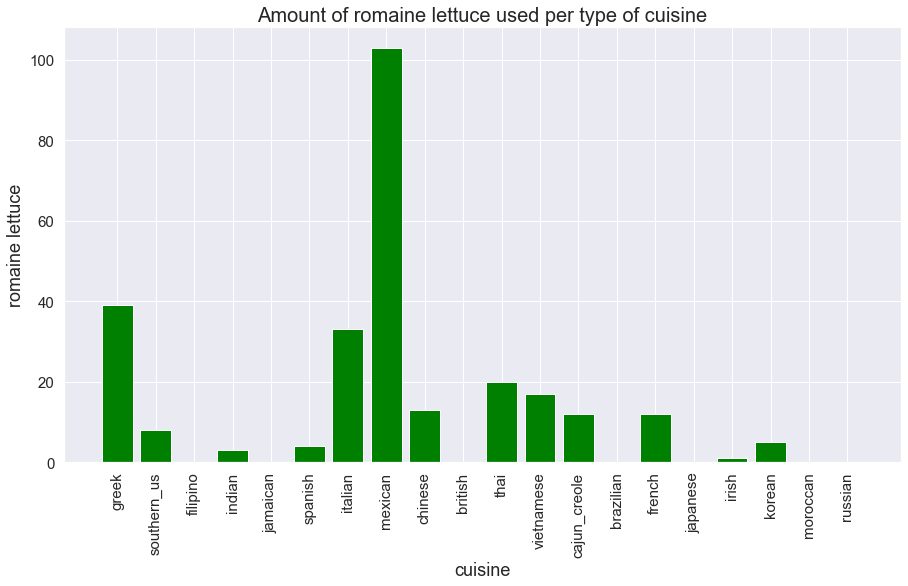

In [27]:
# Build the bar plot for romaine lettuce
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['romaine lettuce'], align='center', alpha=1, color = 'green')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('romaine lettuce', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of romaine lettuce used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Show the figure
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### 3. a) (II) Amount of black olives used per type of cuisine

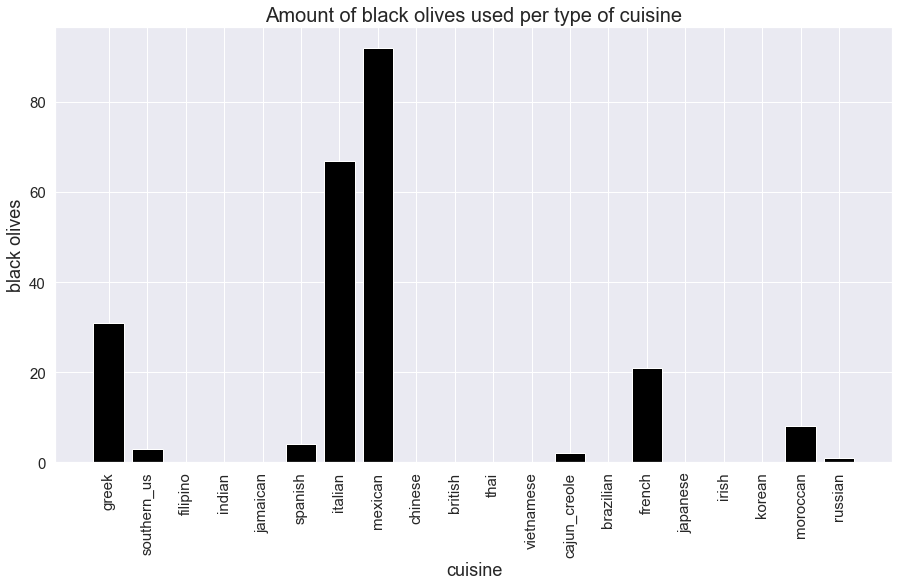

In [28]:
# Build the bar plot for black olives
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['black olives'], align='center', alpha=1, color = 'black')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('black olives', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of black olives used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Show the figure
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### 3. a) (III) Amount of grape tomatoes used per type of cuisine

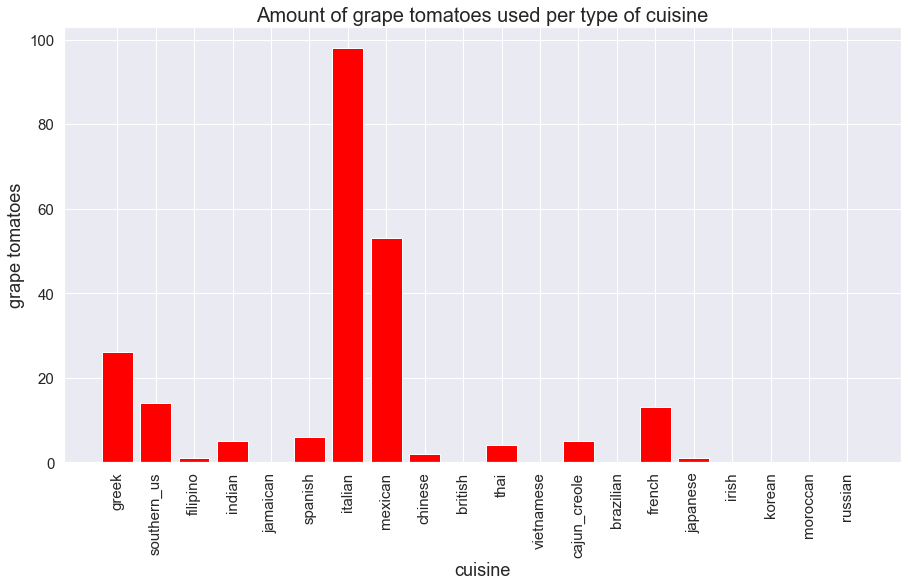

In [29]:
# Build the bar plot for grape tomatoes
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(cuisines, main_data['grape tomatoes'], align='center', alpha=1, color = 'red')
ax.set_xlabel('cuisine', fontsize = 18)
ax.set_ylabel('grape tomatoes', fontsize = 18)
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('Amount of grape tomatoes used per type of cuisine', fontsize = 20)
ax.yaxis.grid(True)

# Show the figure
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Remark
`Romaine lettuce`, `black olives`, and `grape tomatoes` were chosen as they were *non-common ingredients*, ingredients used for a particular type of cuisine and in this case it's mexican, mexican, italian respectively.

### 3. b) What is the cuisine's ingredients shared percentage with other cuisine ingredients?

In [30]:
# To show the sum of each ingredient used in all the cuisines. Here we displayed three ingredients which are romaine lettuce, black olives and grape tomatoes
x = "romaine lettuce"
romainelettuce_sum = main_data[x].sum()
print('Total of all romaine lettuce of all cuisines\t:', romainelettuce_sum)

y = "black olives"
blackolives_sum = main_data[y].sum() 
print('Total of all black olives of all cuisines\t:', blackolives_sum)

z = "grape tomatoes"
grapetomatoes_sum = main_data[z].sum()
print('Total of all grape tomatoes of all cuisines\t:', grapetomatoes_sum)

Total of all romaine lettuce of all cuisines	: 270.0
Total of all black olives of all cuisines	: 229.0
Total of all grape tomatoes of all cuisines	: 228.0


#### 3. b) (I) Romaine lettuce shared percentage

In [31]:
# Extract romaine lettuce column from the main_data dataframe
romainelettucecolumn = main_data[["cuisine","romaine lettuce"]]
romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100
print(romainelettucecolumn) # New dataframe for romaine lettuce

         cuisine  romaine lettuce  percentage of romaine lettuce
0          greek             39.0                      14.444444
1    southern_us              8.0                       2.962963
2       filipino              0.0                       0.000000
3         indian              3.0                       1.111111
4       jamaican              0.0                       0.000000
5        spanish              4.0                       1.481481
6        italian             33.0                      12.222222
7        mexican            103.0                      38.148148
8        chinese             13.0                       4.814815
9        british              0.0                       0.000000
10          thai             20.0                       7.407407
11    vietnamese             17.0                       6.296296
12  cajun_creole             12.0                       4.444444
13     brazilian              0.0                       0.000000
14        french         

<ipython-input-31-f06060ad8733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100


greek - 14.4%
southern_us - 2.9%
filipino - 0.0%
indian - 1.1%
jamaican - 0.0%
spanish - 1.4%
italian - 12.2%
mexican - 38.1%
chinese - 4.8%
british - 0.0%
thai - 7.4%
vietnamese - 6.2%
cajun_creole - 4.4%
brazilian - 0.0%
french - 4.4%
japanese - 0.0%
irish - 0.3%
korean - 1.8%
moroccan - 0.0%
russian - 0.0%


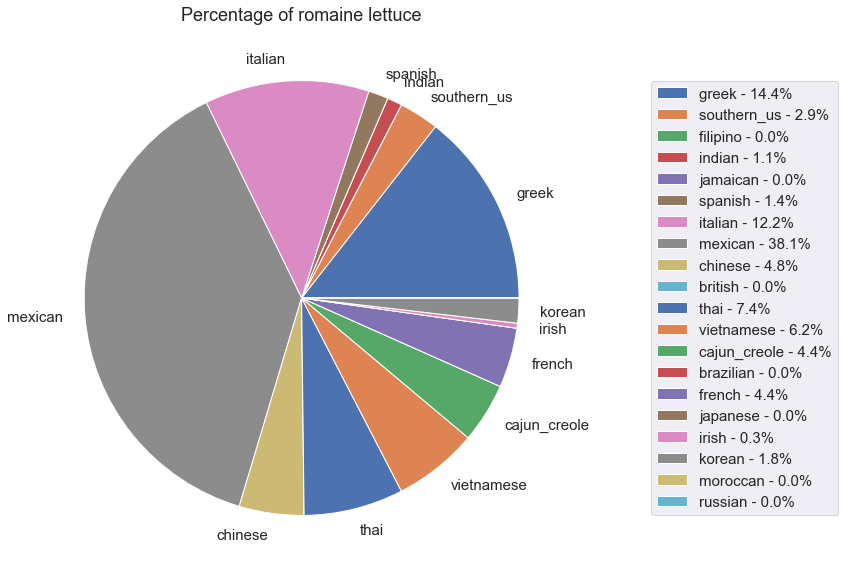

In [32]:
# To display a pie plot of the shared percentage of romaine lettuce among the 20 cuisines 
romainelettucecolumn.plot(y = 'percentage of romaine lettuce', figsize=(20,10), kind = 'pie', labels = cuisines, fontsize = 15)
customLegend = []
for i in range(len(romainelettucecolumn['percentage of romaine lettuce'])):
    desc = romainelettucecolumn['cuisine'][i] + ' - ' + str(math.floor(romainelettucecolumn['percentage of romaine lettuce'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)
plt.ylabel("")
plt.title('Percentage of romaine lettuce', fontsize = 18)
plt.legend(customLegend, bbox_to_anchor=(1.5, 0.5), loc='center right', fontsize = 15)
plt.show()

#### 3. b) (II) Black olives shared percentage

In [33]:
# Extract black olives column from the main_data dataframe
blackolivescolumn = main_data[["cuisine","black olives"]] 
blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100
print(blackolivescolumn)  # New dataframe for black olives

         cuisine  black olives  percentage of black olives
0          greek          31.0                   13.537118
1    southern_us           3.0                    1.310044
2       filipino           0.0                    0.000000
3         indian           0.0                    0.000000
4       jamaican           0.0                    0.000000
5        spanish           4.0                    1.746725
6        italian          67.0                   29.257642
7        mexican          92.0                   40.174672
8        chinese           0.0                    0.000000
9        british           0.0                    0.000000
10          thai           0.0                    0.000000
11    vietnamese           0.0                    0.000000
12  cajun_creole           2.0                    0.873362
13     brazilian           0.0                    0.000000
14        french          21.0                    9.170306
15      japanese           0.0                    0.0000

<ipython-input-33-f05acad01160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100


greek - 13.5%
southern_us - 1.3%
filipino - 0.0%
indian - 0.0%
jamaican - 0.0%
spanish - 1.7%
italian - 29.2%
mexican - 40.1%
chinese - 0.0%
british - 0.0%
thai - 0.0%
vietnamese - 0.0%
cajun_creole - 0.8%
brazilian - 0.0%
french - 9.1%
japanese - 0.0%
irish - 0.0%
korean - 0.0%
moroccan - 3.4%
russian - 0.4%


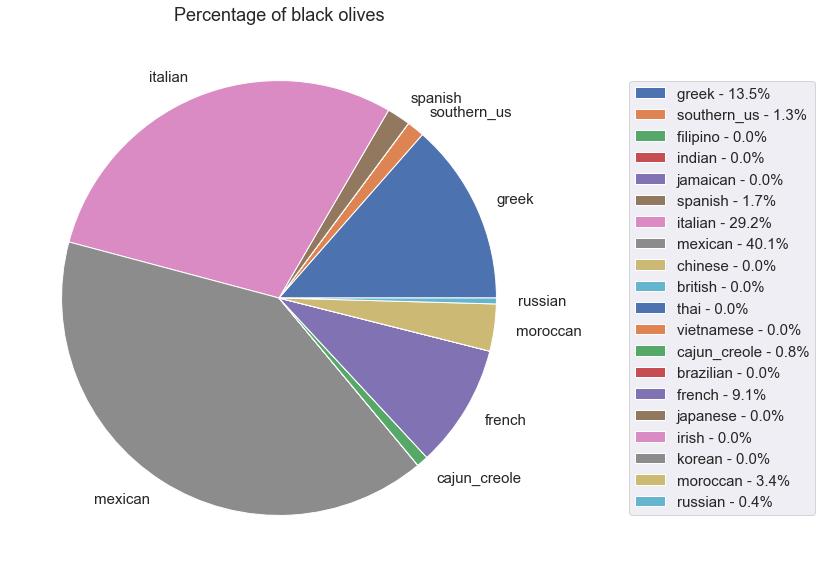

In [34]:
# To display a pie plot of the shared percentage of black olives among the 20 cuisines 
blackolivescolumn.plot(y= 'percentage of black olives', figsize=(20,10), kind = 'pie', labels = cuisines, fontsize = 15)
customLegend = []
for i in range(len(blackolivescolumn['percentage of black olives'])):
    desc = blackolivescolumn['cuisine'][i] + ' - ' + str(math.floor(blackolivescolumn['percentage of black olives'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)
plt.ylabel("")
plt.title('Percentage of black olives', fontsize = 18)
plt.legend(customLegend,  bbox_to_anchor=(1.5, 0.5), loc='center right', fontsize = 15)
plt.show()

#### 3. b) (III) Grape tomatoes shared percentage

In [35]:
# Extract grape tomatoes column from the main_data dataframe
grapetomatoescolumn = main_data[["cuisine","grape tomatoes"]] 
grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100
print(grapetomatoescolumn)  # New dataframe for grape tomatoes

         cuisine  grape tomatoes  percentage of grape tomatoes
0          greek            26.0                     11.403509
1    southern_us            14.0                      6.140351
2       filipino             1.0                      0.438596
3         indian             5.0                      2.192982
4       jamaican             0.0                      0.000000
5        spanish             6.0                      2.631579
6        italian            98.0                     42.982456
7        mexican            53.0                     23.245614
8        chinese             2.0                      0.877193
9        british             0.0                      0.000000
10          thai             4.0                      1.754386
11    vietnamese             0.0                      0.000000
12  cajun_creole             5.0                      2.192982
13     brazilian             0.0                      0.000000
14        french            13.0                      5

<ipython-input-35-507c5d1413ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100


greek - 11.4%
southern_us - 6.1%
filipino - 0.4%
indian - 2.1%
jamaican - 0.0%
spanish - 2.6%
italian - 42.9%
mexican - 23.2%
chinese - 0.8%
british - 0.0%
thai - 1.7%
vietnamese - 0.0%
cajun_creole - 2.1%
brazilian - 0.0%
french - 5.7%
japanese - 0.4%
irish - 0.0%
korean - 0.0%
moroccan - 0.0%
russian - 0.0%


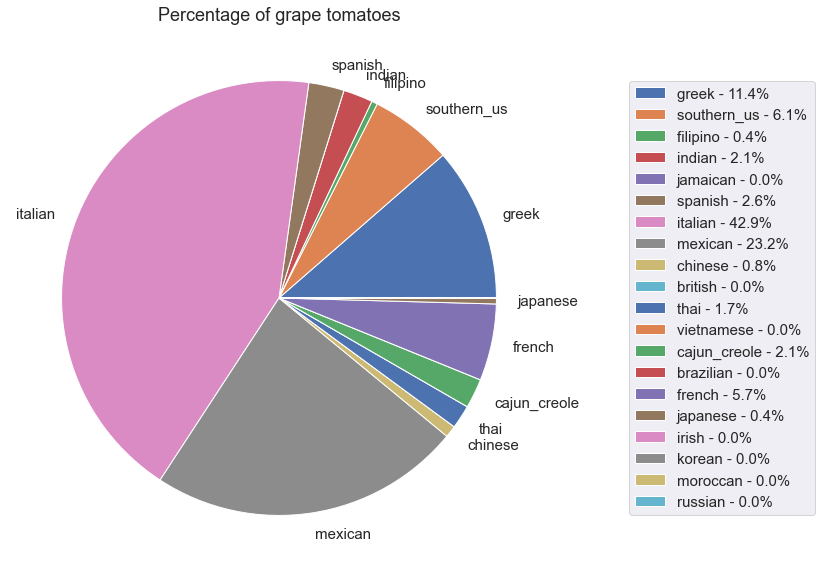

In [36]:
# To display a pie plot of the shared percentage of grape tomatoes among the 20 cuisines  
grapetomatoescolumn.plot(y= 'percentage of grape tomatoes', figsize=(20,10), kind = 'pie', labels = cuisines, fontsize = 15)
customLegend = []
for i in range(len(grapetomatoescolumn['percentage of grape tomatoes'])):
    desc = grapetomatoescolumn['cuisine'][i] + ' - ' + str(math.floor(grapetomatoescolumn['percentage of grape tomatoes'][i]*10)/10) + '%'
    print(desc)
    customLegend.append(desc)
plt.ylabel("")
plt.title('Percentage of grape tomatoes', fontsize = 18)
plt.legend(customLegend,  bbox_to_anchor=(1.5, 0.5), loc='center right', fontsize = 15)
plt.show()

## 4. Machine Learning

In [37]:
# Import libraries
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# split the data: train and test
ingredients_data = train_data.drop(['id', 'cuisine','ingredients'],axis=1)
ingredients_data
cuisine_data = train_data['cuisine']
cuisine_data

# Random Train-Test-Split
seed = 7
testSize = 0.25
cuisine_train, cuisine_test= train_test_split(cuisine_data, test_size = testSize, random_state = seed)
ingredients_train, ingredients_test= train_test_split(ingredients_data, test_size = testSize, random_state = seed)

# Check the sample sizes
print("Train set : ", cuisine_train.shape)
print("Test set : ", cuisine_test.shape)

Train set :  (29830,)
Test set :  (9944,)


In [39]:
# train the model
model = XGBClassifier()
model.fit(ingredients_train, cuisine_train)

C:\Users\lrazerblade\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

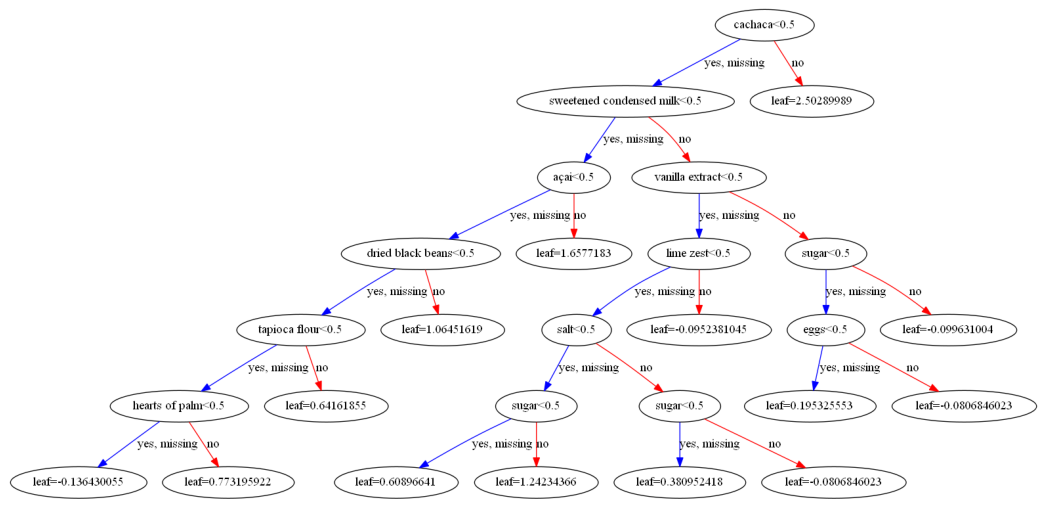

In [40]:
# plot single tree
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

The decision tree shows how a particular cuisine is predicted based on ingredients present.

In [41]:
# make predictions for test data
y_pred = model.predict(ingredients_test)
predictions = [value for value in y_pred]

In [42]:
# evaluate predictions
accuracy = accuracy_score(cuisine_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.41%


### What kind of cuisine is produced?
#### Try predicting the cuisines!
List of cuisines.<br>
    Greek,  southern_us,  filipino,  indian,  chinese,  japanese,  korean,  irish,  jamaican,  italian<br>
    Russian,  mexican,  british,  vietnamese,  french,  brazilian,  cajun_creole,  moroccan,  russian,  spanish

Run the codes below to test.

In [43]:
# Get unique set of ingredients from users
print("Enter your ingredients (key in 0 to stop)")
print("Ingredients should be in small letters.")
new_ingredients = list()
endkey = ""
while (endkey != '0'):
    item = input("ingredient: ")
    new_ingredients.append(item)
    endkey = item
new_ingredients.pop()    
user_ingredients = list(set(new_ingredients))
print("Your ingredients: " + str(user_ingredients))

Enter your ingredients (key in 0 to stop)
Ingredients should be in small letters.
ingredient: eggs
ingredient: salt
ingredient: romaine lettuce
ingredient: 0
Your ingredients: ['eggs', 'romaine lettuce', 'salt']


In [44]:
# prepare the dataset template for predicting
for e in ingredient_dict_count.keys():
    train_data[e] = np.zeros((train_data.shape[0], 1))
    # To create a new ingredient column with 0 as initial value
temp = pd.DataFrame(train_data.head(1).drop(['id', 'cuisine', 'ingredients'], axis=1))
temp

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# populate template with user ingredients
user_temp = temp
for item in user_ingredients:
    if item in user_temp:
        user_temp[item] = 1
user_temp

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# predict cuisine
user_pred = model.predict(user_temp)
predictions = [value for value in user_pred]
print(predictions)

['italian']
